In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tyagi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [4]:
dataset = pd.read_csv("training.1600000.processed.noemoticon.csv" , encoding= 'ISO-8859-1')

In [5]:
dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:

col_names = ['target' , 'id' , 'date' , 'flag' , 'user' , 'text']
dataset.columns = col_names

In [7]:
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
dataset.shape

(1599999, 6)

In [8]:
#checking for missing values
dataset.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [10]:
# Distribution of tweets
dataset['target'].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

In [11]:
# Converting 0 to -ve and 4 to +ve
dataset['target'] = dataset['target'].map({0:0 , 4:1})

In [12]:
dataset['target'].value_counts()

target
1    800000
0    799999
Name: count, dtype: int64

In [13]:
# Stemming

stremmer = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) # removing not a-z and A-Z
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stremmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [14]:
sample_df = dataset.sample(10000, random_state=42)
sample_df['text'] = sample_df['text'].apply(stemming)

In [15]:
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [16]:
x = dataset['text']
y = dataset['target']

In [17]:
# splitting the dataset
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [18]:
# convert textual data to numerical data
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [20]:
print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15188133 stored elements and shape (1279999, 588958)>
  Coords	Values
  (0, 283678)	0.11963044873134729
  (0, 567458)	0.2117590432241851
  (0, 546444)	0.13110375568900662
  (0, 218982)	0.17560132527703673
  (0, 217891)	0.13830752789131484
  (0, 508644)	0.1865617459839415
  (0, 486053)	0.15429339772493936
  (0, 364589)	0.16075477058257603
  (0, 331512)	0.4827791362717877
  (0, 542863)	0.3941117269212658
  (0, 230550)	0.18237085926222382
  (0, 523010)	0.12969477325997483
  (0, 497114)	0.36145902204060715
  (0, 213371)	0.4691562640762748
  (1, 372613)	0.26682925664941753
  (1, 537250)	0.7375855377011513
  (1, 244120)	0.6202980915414966
  (2, 88575)	0.5163168725911714
  (2, 219086)	0.20861007959696407
  (2, 384515)	0.24859958550655706
  (2, 366620)	0.3956805935259804
  (2, 524038)	0.6866832135425449
  (3, 247783)	0.3993877526950337
  (3, 416279)	0.47938639525150156
  (3, 516131)	0.2951126194653137
  :	:
  (1279996, 200539)	0.365

In [21]:
# Training the model
model = LogisticRegression()
model.fit(x_train , y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [22]:
# Testing the model
y_pred = model.predict(x_test)
print(accuracy_score(y_test , y_pred))

0.79903125


Accuracy: 0.7990
Precision: 0.7917
Recall: 0.8113
F1-Score: 0.8014


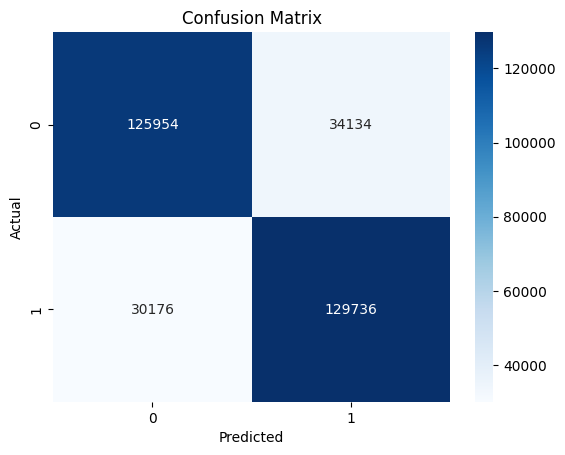

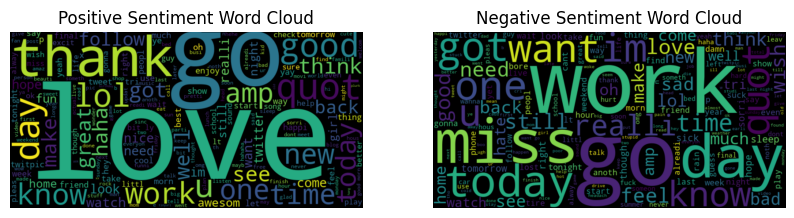

Logistic Regression Accuracy: 0.7990


In [ ]:
# ...existing code...

# Add a new cell after the testing cell for comprehensive evaluation and visualizations
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Detailed Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Word Clouds (using sample_df for stemmed text)
positive_text = ' '.join(sample_df[sample_df['target'] == 1]['text'])
negative_text = ' '.join(sample_df[sample_df['target'] == 0]['text'])

wordcloud_pos = WordCloud(width=800, height=400).generate(positive_text)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

wordcloud_neg = WordCloud(width=800, height=400).generate(negative_text)
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()

# Model Comparison (add this as another new cell if desired)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=10)  # Reduced for speed
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_model = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred_model)
    print(f'{name} Accuracy: {acc:.4f}')

# ...existing code...

In [ ]:
# Function to predict the sentiment
def predict_sentiment(text):
    text = re.sub('[^a-zA-Z]',' ',text) # removing not a-z and A-Z
    text = text.lower()
    text = text.split() 
    text = [stremmer.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    text = [text]
    text = vectorizer.transform(text)   
    sentiment = model.predict(text)
    if sentiment == 0:
        return "Negative"
    else:
        return "Positive"

In [24]:
# Testing the model
print(predict_sentiment("I hate you"))
print(predict_sentiment("I love you"))

Negative
Positive


In [25]:
# Save the model
import pickle
pickle.dump(model , open('model.pkl' , 'wb'))

In [26]:
pickle.dump(vectorizer , open('vectorizer.pkl' , 'wb'))